In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
data = pd.read_csv('./world_economic_indicators.csv')

In [ ]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16758 entries, 0 to 16757
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country Name                                  16758 non-null  object 
 1   Country Code                                  16758 non-null  object 
 2   Year                                          16758 non-null  int64  
 3   Personal remittances, received (% of GDP)     8817 non-null   float64
 4   Unemployment, total (% of total labor force)  7512 non-null   float64
 5   GDP (current US$)_x                           13365 non-null  float64
 6   GDP growth (annual %)_x                       12731 non-null  float64
 7   GDP (current US$)_y                           13365 non-null  float64
 8   GDP growth (annual %)_y                       12731 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.2+ MB
None


In [6]:
# Display summary statistics
print(data.describe())

               Year  Personal remittances, received (% of GDP)  \
count  16758.000000                                8817.000000   
mean    1991.000000                                   3.687891   
std       18.184785                                   9.373359   
min     1960.000000                                   0.000000   
25%     1975.000000                                   0.335264   
50%     1991.000000                                   1.282325   
75%     2007.000000                                   3.787074   
max     2022.000000                                 235.927991   

       Unemployment, total (% of total labor force)  GDP (current US$)_x  \
count                                   7512.000000         1.336500e+04   
mean                                       7.880116         1.206986e+12   
std                                        5.524284         5.412748e+12   
min                                        0.095000         8.824746e+06   
25%                      

In [ ]:
# Remove rows with NaN values in a specific column
data_cleaned = data.dropna(subset=['GDP (current US$)_x'])

In [9]:
# Fill NaN values in a column with the mean of that column
mean_gdp = data['GDP (current US$)_x'].mean()
data['GDP (current US$)_x'].fillna(mean_gdp, inplace=True)

C:\Users\41783\AppData\Local\Temp\ipykernel_16460\4292508927.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GDP (current US$)_x'].fillna(mean_gdp, inplace=True)


In [11]:
# Forward fill NaN values in a column
data['GDP (current US$)_x'].fillna(method='ffill', inplace=True)

C:\Users\41783\AppData\Local\Temp\ipykernel_16460\4258273198.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GDP (current US$)_x'].fillna(method='ffill', inplace=True)
C:\Users\41783\AppData\Local\Temp\ipykernel_16460\4258273198.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['GDP (current US$)_x'].fillna(method='ffill', inplace=True)


In [12]:
# Interpolate NaN values in a column using linear interpolation
data['GDP (current US$)_x'].interpolate(method='linear', inplace=True)

C:\Users\41783\AppData\Local\Temp\ipykernel_16460\1319832920.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GDP (current US$)_x'].interpolate(method='linear', inplace=True)


In [15]:
# Preview the first few rows of the dataset
print(data.head())
print(data.columns)

                  Country Name Country Code  Year  \
0                        Aruba          ABW  1960   
1  Africa Eastern and Southern          AFE  1960   
2                  Afghanistan          AFG  1960   
3   Africa Western and Central          AFW  1960   
4                       Angola          AGO  1960   

   Personal remittances, received (% of GDP)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Unemployment, total (% of total labor force)  GDP (current US$)_x  \
0                                           NaN         1.206986e+12   
1                                           NaN         2.112502e+10   
2                                           NaN         5.377778e+08   
3                                           NaN         1.044764e+10   
4                               

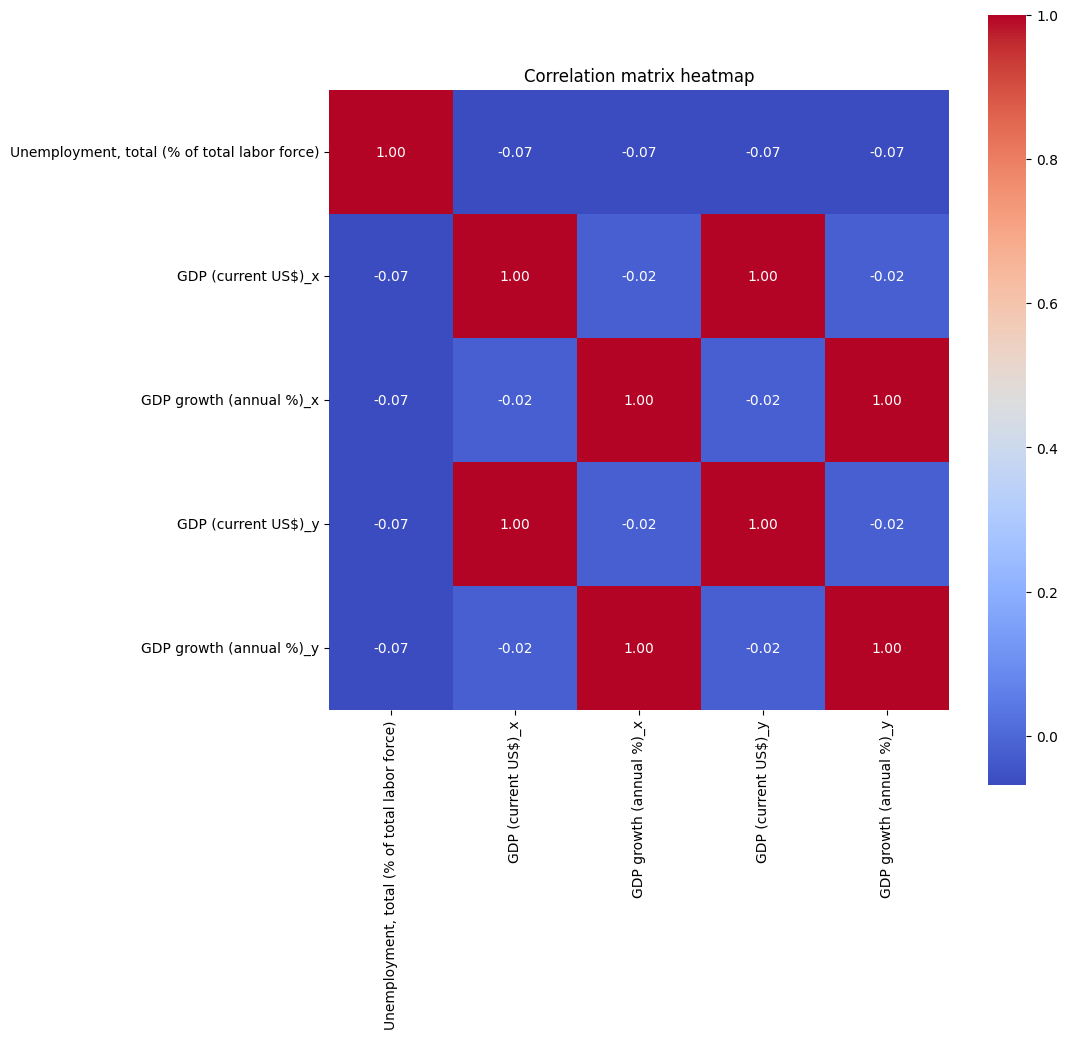

In [16]:
# Correlation matrix heatmap
chosen_columns = ['Unemployment, total (% of total labor force)', 'GDP (current US$)_x', 'GDP growth (annual %)_x', 'GDP (current US$)_y', 'GDP growth (annual %)_y']
correlation_matrix = data[chosen_columns].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True, fmt='.2f')
plt.title('Correlation matrix heatmap')
plt.show()

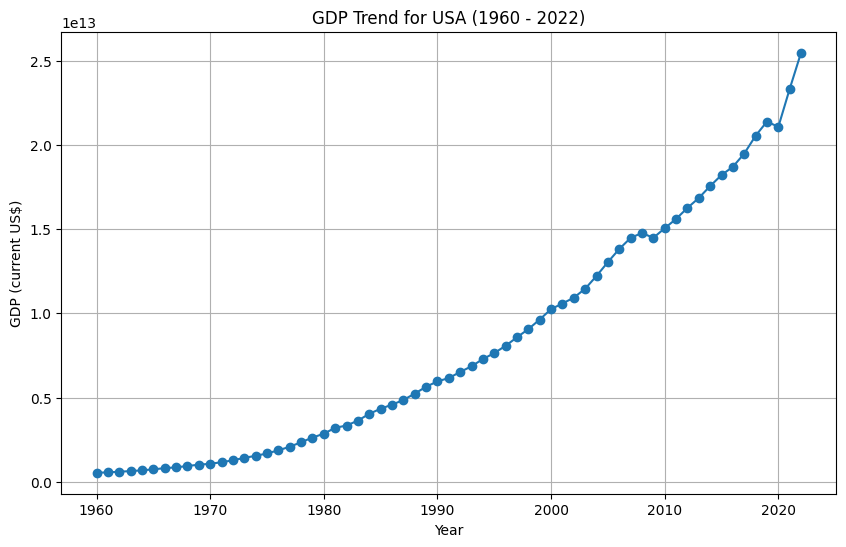

In [17]:
# Plotting GDP over the years for a specific country
country_code = 'USA'
data_country = data[data['Country Code'] == country_code]

plt.figure(figsize=(10, 6))
plt.plot(data_country['Year'], data_country['GDP (current US$)_x'], marker='o', linestyle='-')
plt.title(f'GDP Trend for {country_code} (1960 - 2022)')
plt.xlabel('Year')
plt.ylabel('GDP (current US$)')
plt.grid(True)
plt.show()

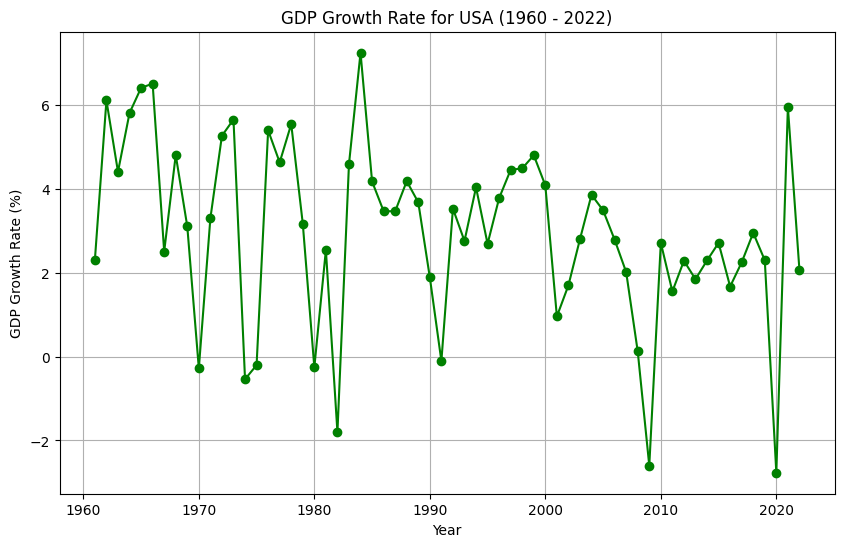

In [18]:
# Plotting GDP growth rates over the years for a specific country
plt.figure(figsize=(10, 6))
plt.plot(data_country['Year'], data_country['GDP growth (annual %)_x'], marker='o', linestyle='-', color='green')
plt.title(f'GDP Growth Rate for {country_code} (1960 - 2022)')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate (%)')
plt.grid(True)
plt.show()

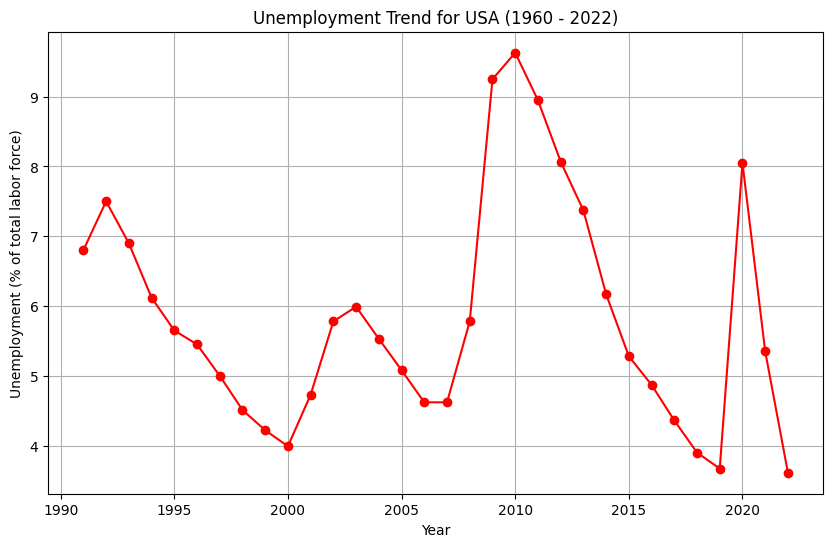

In [20]:
# Plotting unemployment rates over the years for a specific country
plt.figure(figsize=(10, 6))
plt.plot(data_country['Year'], data_country['Unemployment, total (% of total labor force)'], marker='o', linestyle='-', color='red')
plt.title(f'Unemployment Trend for {country_code} (1960 - 2022)')
plt.xlabel('Year')
plt.ylabel('Unemployment (% of total labor force)')
plt.grid(True)
plt.show()